In [4]:
import numpy as np
import tensorflow as tf
import math
from skimage.transform import resize
from PIL import Image
import h5py
from tensorflow.python.framework import ops
import scipy
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage
import os
import cv2
import random
from sklearn.utils import shuffle
import pickle as pkl
import tensornets as nets

In [37]:
np.random.seed(1)
x=np.random.rand(4)
np.random.seed(1)
y=np.random.rand(4)
print(x)
print(y)

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]


In [38]:
def one_hot_encode(y,n_labels):
    return np.eye(n_labels)[y]

In [30]:
classes=os.listdir("leaf_dataset")
n_class=len(classes)
samples_per_class=16
image_width=224 # width of image
image_height=224 # height of image
n_channel=3 # number of channels
m=n_class*samples_per_class # Number of samples))

train_ratio=0.7
validation_ratio=0.2
test_ratio=0.1

ntraining_samples=int(samples_per_class*train_ratio)
nvalidation_samples=int(samples_per_class*validation_ratio)
ntest_samples=samples_per_class-ntraining_samples-nvalidation_samples


In [57]:
def to_rgb(img):
    img = cv2.resize(img, dsize=(224,224), interpolation = cv2.INTER_AREA) 
#     img=cv2.resize(img, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel)/255
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    print(img_rgb.shape)
    return img_rgb/255

In [58]:
def load_dataset(isSave):
    
    # isSave will be true when we want to save the data in pkl and will be false when 
    # we want to get the data from pkl
    if isSave:
        classes=os.listdir("leaf_dataset")

        n_class=len(classes)
        samples_per_class=16
        image_width=224 # width of image
        image_height=224 # height of image
        n_channel=3 # number of channels
        m=n_class*samples_per_class # Number of samples))

        train_ratio=0.7
        validation_ratio=0.2
        test_ratio=0.1

        ntraining_samples=int(samples_per_class*train_ratio)
        nvalidation_samples=int(samples_per_class*validation_ratio)
        ntest_samples=samples_per_class-ntraining_samples-nvalidation_samples
        

        print("m",m)
        print("classes",len(classes))
        print("ntraining_samples",ntraining_samples)
        print("nvalidation_samples",nvalidation_samples)
        print("ntest_samples",ntest_samples)

#         x_train_set=np.zeros((ntraining_samples*n_class,image_width,image_height,n_channel),dtype=np.float32)
#         x_validation_set=np.zeros((nvalidation_samples*n_class,image_width,image_height,n_channel),dtype=np.float32)
#         x_test_set=np.zeros((ntest_samples*n_class,image_width,image_height,n_channel),dtype=np.float32)

#         y_train_set=np.zeros((ntraining_samples*n_class),dtype=int)
#         y_validation_set=np.zeros((nvalidation_samples*n_class),dtype=int)
#         y_test_set=np.zeros((ntest_samples*n_class),dtype=int)
        x_train_set=[]
        y_train_set=[]
        x_validation_set=[]
        y_validation_set=[]
        x_test_set=[]
        y_test_set=[]

        train_count=0
        test_count=0
        validation_count=0
        
        print("Data is Saving .....")

        for count,class_name in enumerate(classes):
            class_name_path="leaf_dataset/"+class_name+"/"

            images=os.listdir(class_name_path);
            random.shuffle(images)

            train_images=images[:ntraining_samples]
            validation_images=images[ntraining_samples:ntraining_samples+nvalidation_samples]
            test_images=images[ntraining_samples+nvalidation_samples:]

#             print("train_images",train_images)
#             print("validation_images",validation_images)
#             print("test_images",test_images)

            # Filling training set
            for image_name in train_images:
    #             print("image_name",image_name)
                image=img.imread(class_name_path+image_name)
    #             print(image.shape)
                image=to_rgb(image)
#                 image=cv2.resize(image, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel)/255
#                 cv2.cvtColor(image, cv2.CV_GRAY2RGB)
    #             print(image.shape)
#                 x_train_set[train_count]=image
#                 y_train_set[train_count]=count
                x_train_set.append(image)
                y_train_set.append(count)
                train_count+=1

            # Filling validation set
            for image_name in validation_images:
    #             print("image_name",image_name)
                image=img.imread(class_name_path+image_name)
    #             print(image.shape)
                image=to_rgb(image)
#                 image=cv2.resize(image, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel)/255
    #             print(image.shape)
#                 x_validation_set[validation_count]=image
#                 y_validation_set[validation_count]=count
                x_validation_set.append(image)
                y_validation_set.append(count)
                validation_count+=1

            # Filling test set
            for image_name in test_images:
    #             print("image_name",image_name)
                image=img.imread(class_name_path+image_name,)
    #             print(image.shape)
                image=to_rgb(image)
#                 image=cv2.resize(image, dsize=(image_height,image_width), interpolation=cv2.INTER_CUBIC).reshape(image_height,image_width,n_channel)/255
    #             print(image.shape)
#                 x_test_set[test_count]=image
#                 y_test_set[test_count]=count
                x_test_set.append(image)
                y_test_set.append(count)
                test_count+=1

#         print(len(classes))
    #     np.set_printoptions(threshold=np.inf)
#         print("y_train_set",y_train_set.shape,y_train_set)
#         print("y_validation_set",y_validation_set.shape,y_validation_set)
#         print("y_test_set",y_test_set.shape,y_test_set)
        
        np.asarray
        x_train_set=[]
        y_train_set=[]
        x_validation_set=[]
        y_validation_set=[]
        x_test_set=[]
        y_test_set=[]

        x_train_set,y_train_set = shuffle(x_train_set,y_train_set, random_state=0) # This shuffles two array altoghether 
        x_validation_set,y_validation_set = shuffle(x_validation_set,y_validation_set, random_state=0)
        x_test_set,y_test_set = shuffle(x_test_set,y_test_set, random_state=0)
        
        with open("xy_train_set.pkl",'wb') as f:
            print(x_train_set.dtype)
            pkl.dump((x_train_set,y_train_set),f)
            
        with open("xy_validation_set.pkl",'wb') as f:
            pkl.dump((x_validation_set,y_validation_set),f)
            
        with open("xy_test_set.pkl",'wb') as f:
            pkl.dump((x_test_set,y_test_set),f)
        print("Data saved successfully")
        return x_train_set,y_train_set,x_validation_set,y_validation_set,x_test_set,y_test_set
            
    else:       
        with open("xy_train_set.pkl",'rb') as f:
            x_train_set,y_train_set=pkl.load(f)
        
        with open("xy_validation_set.pkl",'rb') as f:
            x_validation_set,y_validation_set=pkl.load(f)
            
        with open("xy_test_set.pkl",'rb') as f:
            x_test_set,y_test_set=pkl.load(f)
        
        print("Data loaded successfully")
        return x_train_set,y_train_set,x_validation_set,y_validation_set,x_test_set,y_test_set


In [6]:
x_train_set,y_train_set,x_validation_set,y_validation_set,x_test_set,y_test_set=load_dataset(isSave=True)
# print(x_train_set,y_train_set,x_validation_set,y_validation_set,x_test_set,y_test_set)
# l=[[1,2,3,4]]
# l=np.asarray(l)
# print(type(l))

<class 'numpy.ndarray'>


In [41]:
x_train_set1=np.zeros((ntraining_samples*n_class,image_width,image_height,n_channel),dtype=np.float32)


def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

for i,image in enumerate(x_train_set):
    x_train_set1[i]=image.reshape(image_height,image_width,n_channel)
x_train_set=x_train_set1

ValueError: cannot reshape array of size 2500 into shape (224,224,3)

In [29]:
m,image_height,image_width,n_channel=x_train_set.shape
n_labels=100
print(image_height,image_width,n_channel,n_labels,x_train_set.dtype,x_test_set.dtype,x_validation_set.dtype)

50 50 1 100 float32 float32 float32


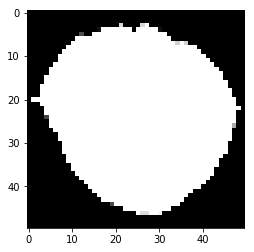

In [42]:
plt.imshow(x_train_set[0].reshape(image_height,image_width),cmap=plt.get_cmap('gray'))

In [43]:
# Applying hot_encode to every y array of training set,validation test and test set

print(type(y_train_set))
y_train_set=one_hot_encode(y_train_set,n_labels)
y_validation_set=one_hot_encode(y_validation_set,n_labels)
y_test_set=one_hot_encode(y_test_set,n_labels)
print(y_train_set.shape)

<class 'numpy.ndarray'>
(1100, 100)


In [44]:
x=tf.placeholder(tf.float32,shape=[None,image_height,image_width,n_channel])
y=tf.placeholder(tf.float32,shape=[None,n_labels])
drop_prob=tf.placeholder(tf.float32)

In [45]:
def initialize_weight(shape):
    init_random_weight=tf.truncated_normal(shape,stddev=1.0)
    return tf.Variable(init_random_weight)

def initialize_bias(shape):
    init_random_bias=tf.constant(0.1,shape=shape) # initialize all the weights with 0.1
    return tf.Variable(init_random_bias)

def conv2d(x,w):
    return tf.nn.conv2d(x,w,strides=[1,1,1,1],padding="SAME")

def max_pooling_2d(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")

def convolution_layer(input_x,shape):
    w=initialize_weight(shape)
    b=initialize_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,w)+b)

def normal_full_layer(input_layer,size):
    input_size=int(input_layer.get_shape()[1]) # getting the number of neuron unit in next layer
    w=initialize_weight([input_size,size])
    b=initialize_bias([size])
    return tf.matmul(input_layer,w)+b
    
    

In [24]:
# Model
print(x)
# Layer 1
convo_1=convolution_layer(x,shape=[5,5,1,32])
max_pooling_1=tf.nn.max_pool(convo_1,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")

# Layer 2
convo_2=convolution_layer(max_pooling_1,shape=[5,5,32,48])
max_pooling_2=tf.nn.max_pool(convo_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")

# Layer 3
convo_3=convolution_layer(max_pooling_2,shape=[5,5,48,64])
max_pooling_3=tf.nn.max_pool(convo_3,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
last_shape=max_pooling_3.get_shape()
print(last_shape)

#Flattening
convo_3_flat=tf.reshape(max_pooling_3,[-1,last_shape[-1]*last_shape[-2]*last_shape[-3]])

#Fully connected layer 1
full_layer_one=tf.nn.relu(normal_full_layer(convo_3_flat,1024))

# dropout
full_one_dropout=tf.nn.dropout(full_layer_one,keep_prob=drop_prob)

#Final layer
output_layer=normal_full_layer(full_one_dropout,n_labels)
y_predict=output_layer

Tensor("Placeholder:0", shape=(?, 50, 50, 1), dtype=float32)
(?, 7, 7, 64)


In [25]:
# Loss function
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=y_predict))


In [26]:
# Optimizer
optimizer=tf.train.AdamOptimizer(learning_rate=0.001)
train=optimizer.minimize(cross_entropy)

In [31]:
init=tf.global_variables_initializer()

In [32]:
def next_batch(i,batch_size):
    batch_x=x_train_set[i:i+batch_size]
    batch_y=y_train_set[i:i+batch_size]
    return batch_x,batch_y

In [46]:
epochs=2
batch_size=50
with tf.Session() as sess:
    sess.run(init)
    index=0
    for i in range(epochs):
        for i in  range()
        batch_x,batch_y=next_batch(index,batch_size)
        index=(index+batch_size)/m
        sess.run(train,feed_dict={x: batch_x,y:batch_y,drop_prob:0.5})
        print(index)
#         if index%batch_size==0:
        print("Step : {}".format(i))
        print("Accuracy")
        matches=tf.equal(tf.argmax(y_predict,1),tf.argmax(y,1))
        accuracy=tf.reduce_mean(tf.cast(matches,tf.float32))
        print(sess.run(accuracy,feed_dict={x:x_test_set,y:y_test_set,drop_prob:1.0}))
        print("\n")
        
        

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,50,50,1]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[?,50,50,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/home/arvind/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/arvind/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/home/arvind/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/arvind/anaconda3/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/home/arvind/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-71e6a590d8ee>", line 1, in <module>
    x=tf.placeholder(tf.float32,shape=[None,image_height,image_width,n_channel])
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1680, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3141, in _placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,50,50,1]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[?,50,50,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [8]:
l=[[1,2],[3,4,4],[5,6,6]]
l[1:8]

[[3, 4, 4], [5, 6, 6]]

In [136]:
a=np.divide(a,3)

In [137]:
a


array([0.33333333, 0.66666667, 1.        , 1.33333333])

# Transfer learning
### Using vgg16 network

In [16]:
n_labels=100
learning_rate=0.0001
x=tf.placeholder(tf.float32,shape=[None,224,224,3])
y=tf.placeholder(tf.float32,shape=[None,n_labels])

In [13]:
logits = nets.VGG19(x, is_training=True, classes=n_labels)
model = tf.identity(logits, name='logits')

ValueError: Variable vgg19/conv1/1/conv/weights already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "/home/arvind/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/variables.py", line 246, in variable
    use_resource=use_resource)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/arg_scope.py", line 182, in func_with_args
    return func(*args, **current_args)
  File "/home/arvind/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/variables.py", line 291, in model_variable
    use_resource=use_resource)


In [14]:
print(model)

Tensor("logits:0", shape=(?, 100), dtype=float32)


In [17]:
loss = tf.losses.softmax_cross_entropy(y, logits)
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [18]:
correct_pred = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [19]:
logits.print_outputs()

Scope: vgg19
conv1/1/conv/BiasAdd:0 (?, 224, 224, 64)
conv1/1/Relu:0 (?, 224, 224, 64)
conv1/2/conv/BiasAdd:0 (?, 224, 224, 64)
conv1/2/Relu:0 (?, 224, 224, 64)
conv1/pool/MaxPool:0 (?, 112, 112, 64)
conv2/1/conv/BiasAdd:0 (?, 112, 112, 128)
conv2/1/Relu:0 (?, 112, 112, 128)
conv2/2/conv/BiasAdd:0 (?, 112, 112, 128)
conv2/2/Relu:0 (?, 112, 112, 128)
conv2/pool/MaxPool:0 (?, 56, 56, 128)
conv3/1/conv/BiasAdd:0 (?, 56, 56, 256)
conv3/1/Relu:0 (?, 56, 56, 256)
conv3/2/conv/BiasAdd:0 (?, 56, 56, 256)
conv3/2/Relu:0 (?, 56, 56, 256)
conv3/3/conv/BiasAdd:0 (?, 56, 56, 256)
conv3/3/Relu:0 (?, 56, 56, 256)
conv3/4/conv/BiasAdd:0 (?, 56, 56, 256)
conv3/4/Relu:0 (?, 56, 56, 256)
conv3/pool/MaxPool:0 (?, 28, 28, 256)
conv4/1/conv/BiasAdd:0 (?, 28, 28, 512)
conv4/1/Relu:0 (?, 28, 28, 512)
conv4/2/conv/BiasAdd:0 (?, 28, 28, 512)
conv4/2/Relu:0 (?, 28, 28, 512)
conv4/3/conv/BiasAdd:0 (?, 28, 28, 512)
conv4/3/Relu:0 (?, 28, 28, 512)
conv4/4/conv/BiasAdd:0 (?, 28, 28, 512)
conv4/4/Relu:0 (?, 28, 28, 5

In [22]:
logits.print_summary()

Scope: vgg19
Total layers: 19
Total weights: 114
Total parameters: 419,939,820


In [23]:
init=tf.global_variables_initializer

In [ ]:
# Training

steps=2
batch_size=50
with tf.Session() as sess:
    sess.run(init)
    sess.run(logits.pretrained)
    for j in range(steps):
        print("Steps :",j)
        for i in range(0,m,batch_size):
          batch_x,batch_y=next_batch(i,batch_size)
#           i=(i+batch_size)/m
          sess.run(train,feed_dict={x: batch_x,y:batch_y})
          print("Step : ",j,"Batch : ",i/batch_size,sep='\t')
          print("Accuracy")
          print(sess.run(accuracy,feed_dict={x:x_validation_set,y:y_validation_set,drop_prob:1.0}))
          print("\n")
    saved_model_path=saver.save(sess,"TrainedVggModel/leaf_Vgg_model.ckpt")
    print("Model saved in path ",saved_model_path)

        